# fbb skeleton notebook for PUI2017 HW6

In [1]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import os
import json
import statsmodels.api as sm
import statsmodels.formula.api as smf


if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

%pylab inline

/home/pui-user/.local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


I am using geopanda. that is **not required** for this particular exercise, but geopanda works with geospacial data: the shape files that we get from pluto for example.

PLEASE REMEMBER: download your data in a reproducible way, seed your random functions if you need to use any, label your axes clearly, captions for each figure that explains what is shown, and what is noticeable about it, comment your code, use PEP8!


** An interesting urban question is "can we measure and predict energy use based on observables that are easily acquired". For example the urban observatory at CUSP can monitor lights: they are a relatively easy observable. All you need is a camera, and a pipeline to process your data. But how does the light coming from a window relate to the total energy consumption? We generally postulate that light is a proxy for occupancy, and that occupancy is a good predictor of energy consumption.**

** So let's test if the last link holds. If we have data on the _energy consumed by a building_ how well does that relate to the _number of units_ in the building?**

** Data on energy consumption can be found here for the city of NY https://data.cityofnewyork.us/Environment/Energy-and-Water-Data-Disclosure-for-Local-Law-84-/rgfe-8y2z  **

** Either obtain the data through the API or download the csv file, and move it to $PUIDATA**

** However this datasets does not have the number of units. We can find that in the [Pluto dataset](https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page).**

** Reading in the Pluto data for manhattan, which will give me the number of units ber building   Manhattan/MNMapPLUTO.shp ** Note that you should keep all the files in the original MNMapPluto zipped folder (not just the .shp file) for geopandas to read the data in correctly.

In [2]:
nrg = gp.GeoDataFrame.from_csv(os.getenv("PUIDATA") + "/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
bsize = gp.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/Manhattan/MNMapPLUTO.shp")

In [3]:
nrg.head()

,BBL,Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Postcode,DOF Benchmarking Submission Status,Site EUI(kBtu/ft2),...,DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,NTA
Record Number,,,,,,,,,,,,,,,,,,,,,
12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,NaN,...,NaN,Office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,NaN,...,82730.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,NaN,...,NaN,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,NaN,...,440360.0,NaN,1.0,40.749652,-74.006471,4.0,3.0,99.0,1012266.0,Hudson Yards-Chelsea-Flatiron-Union Square ...
15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,NaN,...,NaN,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
bsize.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area,geometry
0,MN,1,201,101,1,1000,02,1,10004,E007,...,10101,,0.000000e+00,,1,16V2,0,6306.265838,1.148541e+06,"POLYGON ((973154.7117999941 194614.3315999955,..."
1,MN,9,14,101,9,1013,02,1,10004,L015,...,10101,,1.000090e+09,12/26/1985,1,16V2,0,686.230174,2.373306e+04,"POLYGON ((980492.3622000068 195423.9451999962,..."
2,MN,15,7501,101,13,2005,02,1,10004,E010,...,10101,,1.000150e+09,12/29/1998,1,16V2,7,1098.925676,6.753824e+04,"POLYGON ((979999.0820000023 196493.2800000012,..."
3,MN,13,5,101,13,2008,02,1,10004,E010,...,10101,,0.000000e+00,,1,16V2,0,709.632239,3.068607e+04,"POLYGON ((980424.4003999978 196274.334800005, ..."
4,MN,1,10,101,5,1018,02,1,10004,E007,...,10101,,0.000000e+00,,1,16V2,0,12277.830569,7.550344e+06,"POLYGON ((979561.8711999953 191884.2495999932,..."


As we discussed, coming up with a sensible model generally requires domain expertise. However, if the data you are investigating shows "obvious patterns", for example if two of the variable look like a line when plotted one against the other, then those patterns (correlations) may help you finding reasonable models for the data.

Explore your data, starting with a scatter matrix. 
A scatter matrix is a plot of all variables in your data against all other variables: 
each pair of variables is a subplot in the plot matrix. The diagonal line then would be a plot of a variable against itself, which is useless, so it is usually substituted by a histogram of that variable (or sometimes a KDE, which is basically a smooth histogram).

## exploratory analysis

/home/pui-user/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


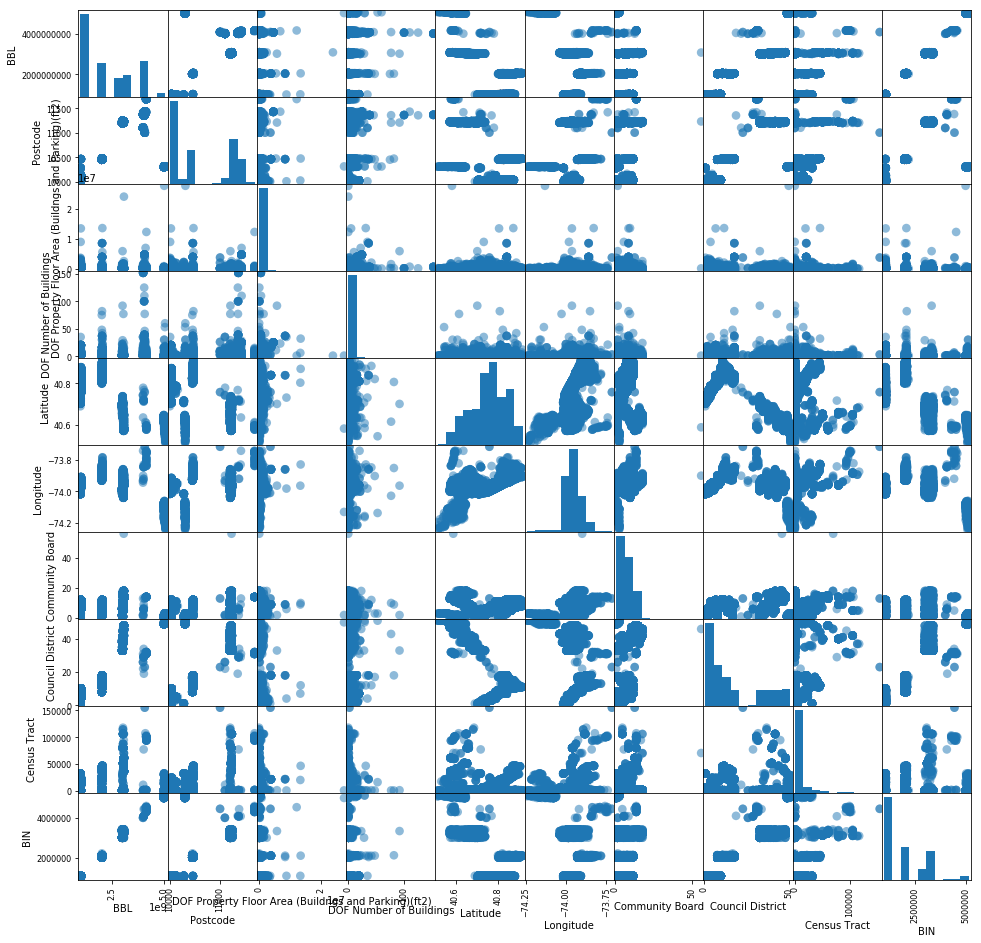

In [5]:
#try make a scatter plot of nrg. Few columns will plot - only those that have numerical values. 
#Pandas will ignore the other ones

from pandas.tools.plotting import scatter_matrix
scatter_matrix(nrg, s=300, figsize=(16, 16));


Figure 1: scatter matrix of all numerical values in the files. ... comments on what you see

This kind of plot shows correlations between variables, but it will also show me what can and cannot be plotted trivially in my dataset. Here only a few columns can be plotted: those that contain only numbers (and possibly NaN's), but most columns contain rows that cannot be converted to float (e.g. entries like 'See Primary BBL' in several rows for the energy dataframe 'Site EUI(kBtu/ft2) ' column) , so Pandas refuses to plot them, cause it does not know what to do with those entries. The columns I am interested in are in fact u'Site EUI(kBtu/ft2)' which is a measure of the energy consumed PER SQ FOOT by a building, and then the building area: for eg. u'Reported Property Floor Area (Building(s)) (ft²)'. Neither gets plotted: I need to remove all values that cannot convert to float in order to use the columns and convert them to float arrays and do math with them.

You can use pd.to_numeric() which is a function that transforms values to float (when possible). The default behavior of this function is to throw an error if it encounters a value that it cannot convert. That behavior can be modified with the "error" keyword, by setting it to "coerce". Please look at the function documentation to understand the syntax.

columns we are interested in are in fact u'Site EUI(kBtu/ft2)' which is a measure of the energy consumed PER SQ FOOT by a building, and then the building area: for eg. u'Reported Property Floor Area (Building(s)) (ft²).
We also need BBL which stands for Borough, block and lot. This is the common column for both nrg and bsize data frames

In [6]:
updated_nrg = nrg[['BBL', 'Site EUI(kBtu/ft2)', 'Reported Property Floor Area (Building(s)) (ft²)']]

updated_nrg.columns = ['BBL','Site EUI(kBtu/ft2)', 'Floor area (ft2)']

updated_nrg.head()

,BBL,Site EUI(kBtu/ft2),Floor area (ft2)
Record Number,,,
12086,1.000410e+09,NaN,918919
14354,4.021460e+09,NaN,NaN
12150,2.027620e+09,NaN,64200
12590,1.006700e+09,NaN,NaN
15591,2.048300e+09,NaN,50000


In [7]:
updated_nrg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16170 entries, 12086 to 13482
Data columns (total 3 columns):
BBL                   16014 non-null float64
Site EUI(kBtu/ft2)    12204 non-null object
Floor area (ft2)      13785 non-null object
dtypes: float64(1), object(2)
memory usage: 505.3+ KB


*** Two of the columns are of type 'object'. We need to convert them to float ***

In [8]:
updated_nrg['Site EUI(kBtu/ft2)'] = pd.to_numeric(updated_nrg['Site EUI(kBtu/ft2)'], errors = 'coerce')

updated_nrg['Floor area (ft2)'] = pd.to_numeric(updated_nrg['Floor area (ft2)'], errors = 'coerce')



/home/pui-user/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/pui-user/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
updated_nrg.dropna(how = 'any')

updated_nrg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16170 entries, 12086 to 13482
Data columns (total 3 columns):
BBL                   16014 non-null float64
Site EUI(kBtu/ft2)    11547 non-null float64
Floor area (ft2)      13045 non-null float64
dtypes: float64(3)
memory usage: 505.3 KB


In [10]:
bsize.drop(['APPBBL', 'APPDate', 'Address', 'AreaSource', 'AssessLand', 'AssessTot', 'BldgArea', 'BldgClass',
       'BldgDepth', 'BldgFront', 'Block', 'BoroCode', 'Borough', 'BsmtCode',
       'BuiltFAR', 'CB2010', 'CD', 'CT2010', 'ComArea', 'CommFAR',
       'CondoNo', 'Council', 'EDesigNum', 'Easements', 'ExemptLand',
       'ExemptTot', 'Ext', 'FacilFAR', 'FactryArea', 'FireComp', 'GarageArea',
       'HealthArea', 'HistDist', 'IrrLotCode', 'LandUse', 'Landmark', 'Lot',
       'LotArea', 'LotDepth', 'LotFront', 'LotType', 'LtdHeight', 'MAPPLUTO_F',
       'NumBldgs', 'NumFloors', 'OfficeArea', 'OtherArea', 'Overlay1',
       'Overlay2', 'OwnerName', 'OwnerType', 'PLUTOMapID', 'PolicePrct',
       'ProxCode', 'ResArea', 'ResidFAR', 'RetailArea', 'SHAPE_Area',
       'SHAPE_Leng', 'SPDist1', 'SPDist2', 'Sanborn', 'SanitBoro',
       'SanitSub', 'SchoolDist', 'SplitZone', 'StrgeArea', 'TaxMap',
       'Tract2010', 'Version', 'XCoord', 'YCoord',
       'YearAlter1', 'YearAlter2', 'ZMCode', 'ZipCode',
       'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'ZoneMap',
       'geometry', 'SanitDistr', 'SPDist3'], axis=1, inplace=True)

In [11]:
bsize.head()

,UnitsRes,UnitsTotal,YearBuilt,BBL
0,0,0,1900,1.000010e+09
1,0,0,1987,1.000090e+09
2,500,602,1902,1.000158e+09
3,0,50,1900,1.000130e+09
4,0,0,1900,1.000010e+09


In [12]:
bsize.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 42686 entries, 0 to 42685
Data columns (total 4 columns):
UnitsRes      42686 non-null int64
UnitsTotal    42686 non-null int64
YearBuilt     42686 non-null int64
BBL           42686 non-null float64
dtypes: float64(1), int64(3)
memory usage: 1.3 MB


In [13]:
df = pd.merge(updated_nrg, bsize, on='BBL').dropna()

In [14]:
df.head()

,BBL,Site EUI(kBtu/ft2),Floor area (ft2),UnitsRes,UnitsTotal,YearBuilt
2,1.013110e+09,125.4,330000.0,0,56,1977
10,1.010140e+09,154.9,841709.0,0,2,1999
15,1.007660e+09,122.3,59468.0,0,8,1912
16,1.008150e+09,117.0,364000.0,0,24,1954
18,1.005050e+09,82.1,235370.0,0,24,1926


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5062 entries, 2 to 5779
Data columns (total 6 columns):
BBL                   5062 non-null float64
Site EUI(kBtu/ft2)    5062 non-null float64
Floor area (ft2)      5062 non-null float64
UnitsRes              5062 non-null int64
UnitsTotal            5062 non-null int64
YearBuilt             5062 non-null int64
dtypes: float64(3), int64(3)
memory usage: 276.8 KB


** MERGE THE DATASETS**
look at the syntax for pandas.merge - this will be incredibly useful to you in all future data problem where you use Pandas and data aggregation is really at the heart of urban science!

TO DO IT WE NEED A COMMON COLUMN: the building id, BBL is in both files. However the name of this variable (column) in the Energy dataset is 'NYC Borough, Block, and Lot (BBL)'. 
You can rename the column, create a whole new column 'BBL' in the energy dataset to pass it to the 'on' keyword argument of the merge pandas method: pd.merge(..... on=['BBL']) will use the common column 'BBL' to join the information from the 2 datasets for each BBL value (check out the complete syntax!). You can also say pd.merge(..., right_on=BBL, left_on="NYC Borough, Block, and Lot (BBL)'). Always make sure though that the data _type_ is the same:printing the columns the content may look the same but your computer wont know it is the same if it is a different data type (e.g. '1' string is not the same as 1 integer'. '1' == 1 returns False)! both have to be integers, both strings, or whatever, but the same, or you will not be able to merge. 

In [16]:
(bsize.BBL.values[0]), (updated_nrg.BBL.values[0])

(1000010201.0, 1000410001.0)

/home/pui-user/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


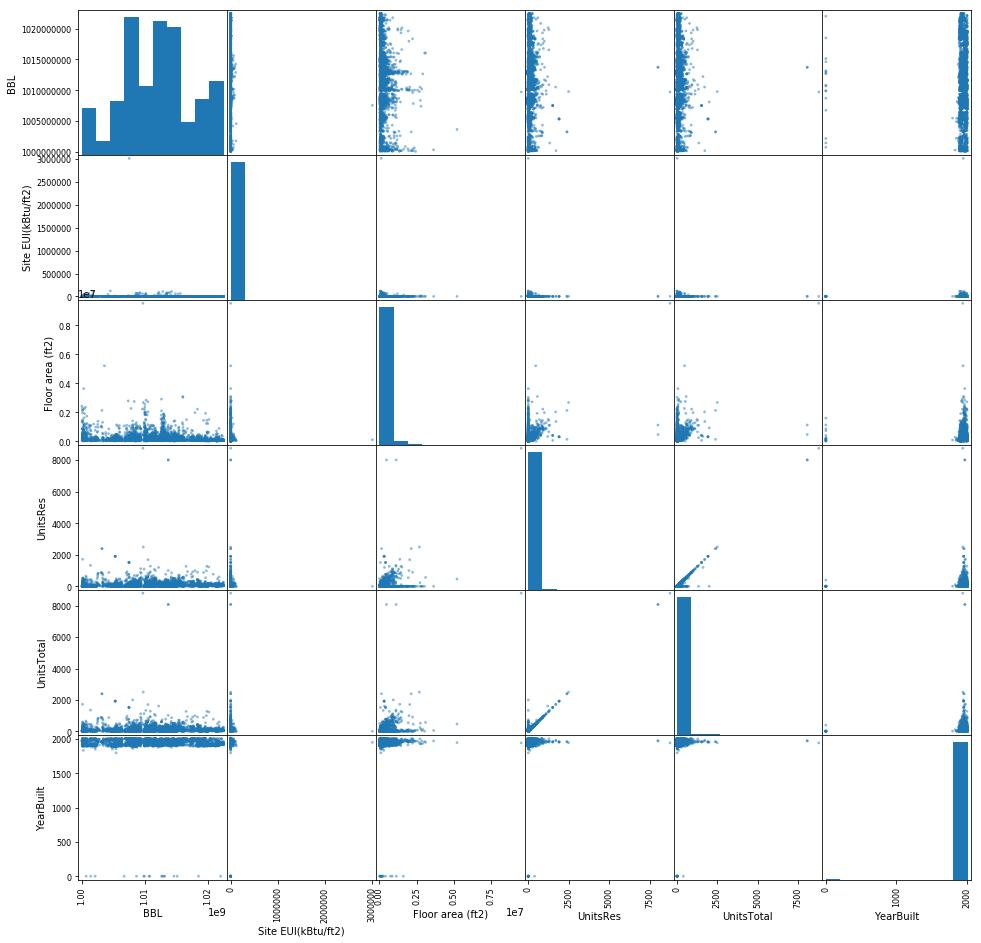

In [17]:

# Now the scatter matrix plot should show more columns.
scatter_matrix (df, s=30, figsize=(16, 16));

Figure 2: scatter matix of final dataset (please describe)

once you have the dataframe with all the info you want, you want to plot Energy vs Number of Units in the Building.  **Energy TOTAL, not per sq ft...** Here you can choose what you think makes more sense for the number of units: all units, residential units... 

**Make a  scatter plot first of Energy vs Units. It will look really bad be cause all the datapoints are at very low Unit numbers while the Unit number range actually goes up to 8000. **


Make a second plot that zooms into the region where most points are by cutting your x and y axis plotted: e,g, use xlim=(1000,1e10), ylim=(1,1000), where the numbers to be plugged in depend on exactly what you chose to plot

I left my plots below as guidance. **Remember, each plot needs a descriptive caption, and axis labels**

In [18]:
df.columns

Index([               u'BBL', u'Site EUI(kBtu/ft2)',   u'Floor area (ft2)',
                 u'UnitsRes',         u'UnitsTotal',          u'YearBuilt'],
      dtype='object')

Text(0,0.5,u'Total Num of Units')

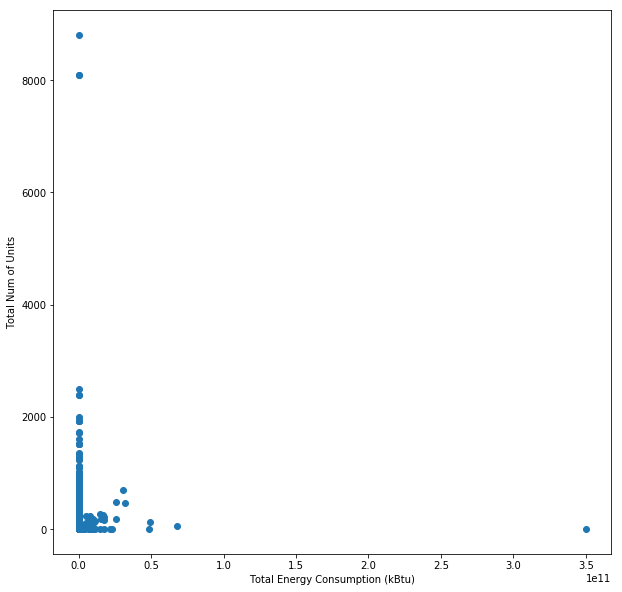

In [19]:
# first scatter plot

df['TotalNrg'] = df['Site EUI(kBtu/ft2)'] * df[u'Floor area (ft2)']

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.scatter(df['TotalNrg'], df['UnitsTotal'])
plt.xlabel("Total Energy Consumption (kBtu)")
plt.ylabel("Total Num of Units")

Text(0,0.5,u'Total Num of Units')

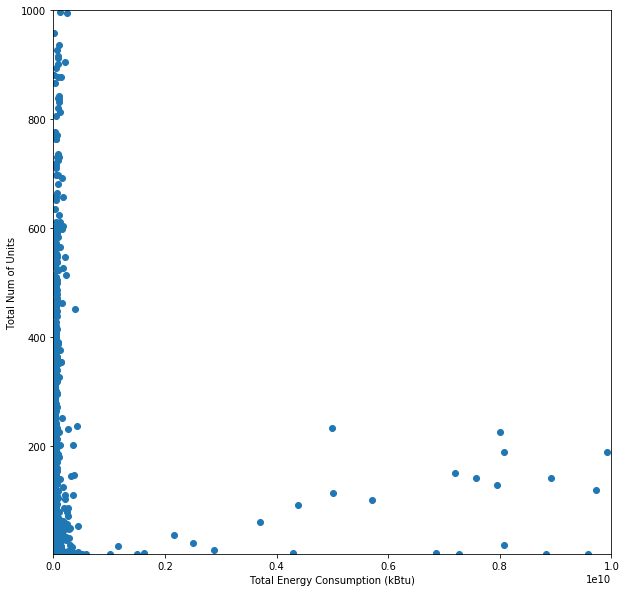

In [20]:
# zoomed in scatter plot


fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.scatter(df['TotalNrg'], df['UnitsTotal'])
ax.set_xlim(xmin=1000, xmax=1e10)
ax.set_ylim(ymin=1, ymax=1000)

plt.xlabel("Total Energy Consumption (kBtu)")
plt.ylabel("Total Num of Units")

** IMPORTANT NOTE ABOUT LOGS AND LOG PLOTS **
in class we talked about logs when we talked about likelihood: often we prefer working with the log(likelihood) instead of the likelihood, and since all problems involving likelihood are about maximization (find the maximum likelihood to find the best fit parameters) and the log is a MONOTONIC function (log(x) grows when x grows, and gets smaller when x gets smaller) the maximum of the likelihood of a model with be in the same place as the maximum of the log(likelihood). 

Another great thing about logarithm: **when the points in a plot all look scrunched against the axis **
**try to make a log plot instead**. In pandas you enable that with the keyword 'loglog' : bblnrgdata.plot(..... loglog=True)

This will compress the high  x and high  y values, and expand the small x and small y values. 



NOTICE THAT YOU WILL STILL HAVE TO CUT YOUR DATASET! in my data I had a lot of energy datapoints that were exactly 0. I removed these "outliers" which I think are truly outliers in the sense that they are misreported numbers. You can remove the data that have nrg==0 (or nrg < some sensible threshold choice) by indexing your array: something like bblnrgdata_cut = bblnrgdata[bblnrgdata.nrg>1000] - see below.

Also I removed the buildings with several thousand units. Points like that at the edge of my range would have a lot of "LEVERAGE", however they are not spurious entries like the 0, which I believe are missing values, or perhaps abandoned lots. These are good datapoint that I need to throw away functionally for my analysis to work, but that should be stated clearly in your report.


/home/pui-user/.local/lib/python2.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


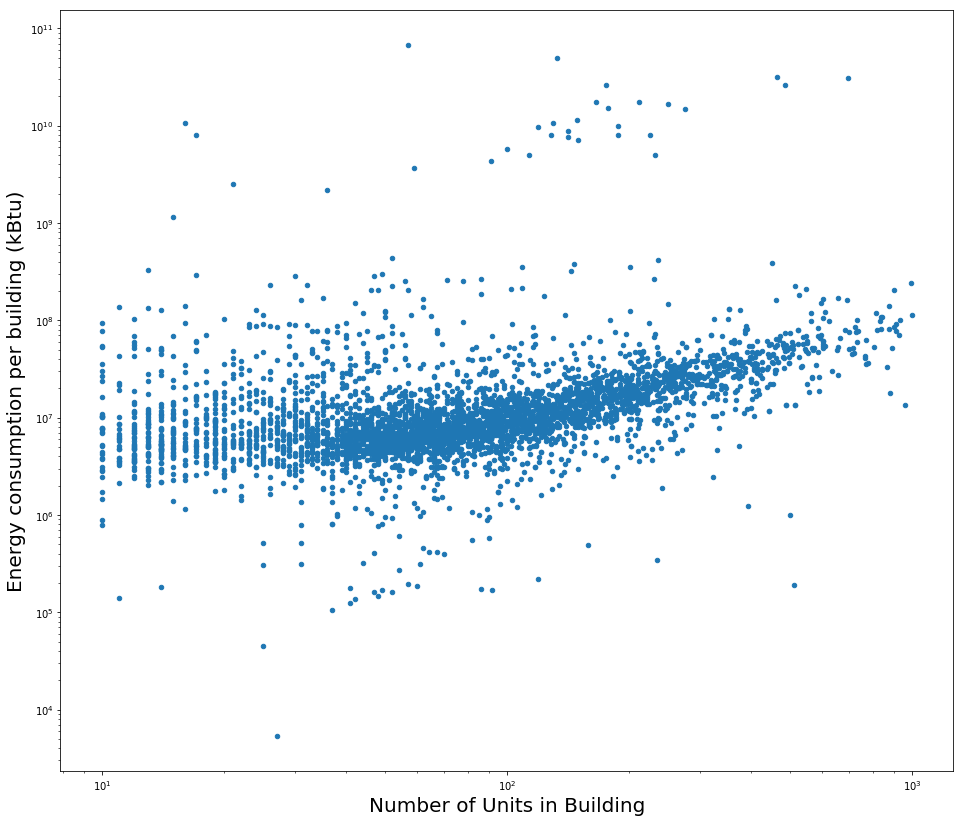

In [21]:
# Cut the data

dfCut = df[(df.TotalNrg > 1000) * (df.UnitsTotal>=10) * 
                           (df.UnitsTotal<1000)]

ax = dfCut.plot(kind='scatter', y='TotalNrg', x='UnitsTotal', 
                   marker='o',  figsize=(16, 14), loglog=True)
yl = ax.set_xlabel("Number of Units in Building", fontsize=20)
xl = ax.set_ylabel("Energy consumption per building (kBtu)", fontsize=20)

Now fit a line through the data. you can use whatever you want to do it: statsmodels, scipy, any other package, or write your own minimization of the residuals

## BUT REMEMBER: we see hints of a linear relation in log space! so we want to fit a line to the log of our variables, not the variables themselves:
if you used statsmodels it would look something like this:


In [22]:
# Setting up x and y
x = dfCut['UnitsTotal']
y = dfCut['TotalNrg']

log_y = np.log10(y).reshape(len(y),1)

log_x = np.log10(x).reshape(len(y),1)

shape(log_y)



/home/pui-user/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
/home/pui-user/.local/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


(4266, 1)

## choose  which is your DEPENDENT and which is your INDEPENDENT variable. 
which is the "logical" IV: what are we assuming depends on what? energy on size of building or building on size of energy... discuss this but also test both fits, energy vs size and size vs energy. how can you compare these models? 




1. **Fit a line** to Units vs Energy. The independent variable in this problem should be number of units, but try fit both Unity to energy and energy to unit.
2. **Fit a line** to Energy vs Units.
3. **Evaluate which is better by calculating the chi square**.  Can you compare these models with the likelihood ratio test? (hint: are they nested??) I provide a function to calculate the chi square or you can write your own.

    The function is :
    
    chisq = $\sum_i \frac{(model(x_i) - data(x_i))^2 }{ error_i^2}$
    
    where the sum is over all datapoints, 
    
    for the i-th value  model($x_i$) is the prediction, data($x_i$) the observation,
    
    and $error_i$ is $\sqrt{data(x_i)}$
    (but remember you worked in log space! What are the proper errors?? see next point)
    
4. *Assume Poisson statistics* for the errors on the *independent variable*. Poisson statistics means your uncertainty is the square root of your measurement. I wrote down the formula for the errors. Please explain why I wrote it as I did.

5. **Fit a 2nd degree polynomial** to the Units vs Energy (with statsmodels.formulae.api.ols() for example passing the formula for a parabola, like we did in class. The formula for a 2nd deg polynomial is 
    $y = ax^2 + bx + c$ .

6. **Compare the Units vs Energy line fit and the Units vs Energy 2-nd degree polynomial fit with the Likelihood ratio test**. The formula is:
    
    LR  =  -2 * log(Likelihood_Model1 / Likelihood_Model2) 

    or equivalently
        
    LR  =  -2 * (logLikelihood_Model1 - logLikelihood_Model2) 
    
    where Model1 is the _least complex_ (fewer parameters).
    
    Th logLikelihood can be extracted from the model summary when using statsmodels. (Model1.llf)
    
    Compare this LR statistics to a chi sq table (for example http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG) and say if *at alpha = 0.05* Model1 is preferable to Model2. The LR is chi^2 distributed with number of degrees of freedom $N_{DOF}$ = parameters_Model2 - parameters_Model1
    
    
    Also if you used statsmodels for the fit you can use the 
    compare_lr_test() method of your fit and verify you got the right answer.  Use the method compare_lr_test() of the most complex model of the 2 and pass it the result of stats models for the simpler fit 
    (e.g. smf.ols(formula = ...).fit().compare_lr_test(sm.OLS(...).fit()))



In [23]:
# fits and plots here
# your plots should show datapoints (as scatter plot) and models (as lines)
# Make sure your model for the quadratic fit looks right: dont just join the points, you need to sort them first!

*** Logically, Energy depends on the unit size. The unit size does not depend on energy consumed. But we will still fit both the models *** 

Text(0,0.5,u'Log - Energy consumption per building (kBtu)')

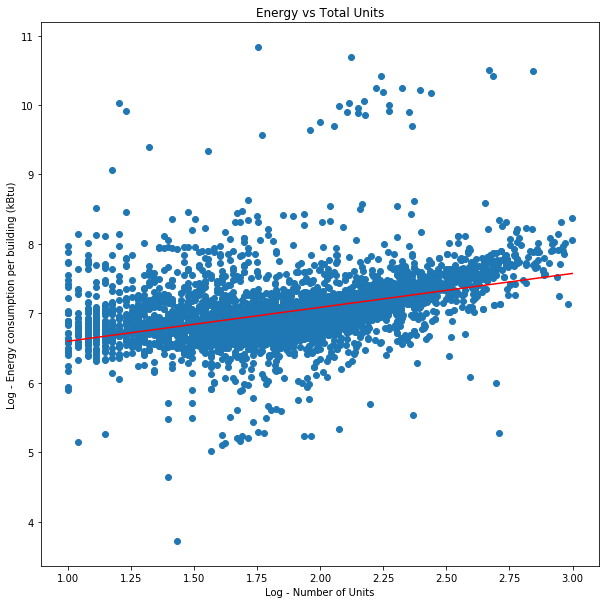

In [24]:
# Energy vs units

X = sm.add_constant(np.log10(x))

linmodel_1 = sm.OLS(log_y, X, missing='drop').fit() # ignores entires 

y_hat = linmodel_1.predict(X)

fig,ax = plt.subplots(1,1,figsize = (10,10))
ax.scatter(np.log10(x), log_y)
ax.plot(np.sort(np.log10(x)),np.sort(y_hat), color = 'red')
plt.title('Energy vs Total Units')
plt.xlabel('Log - Number of Units')
plt.ylabel('Log - Energy consumption per building (kBtu)')


In [25]:
linmodel_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     827.2
Date:                Mon, 23 Oct 2017   Prob (F-statistic):          2.05e-166
Time:                        23:22:39   Log-Likelihood:                -2563.5
No. Observations:                4266   AIC:                             5131.
Df Residuals:                    4264   BIC:                             5144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1110      0.033    187.012      0.000       6.047       6.175
UnitsTotal     0.4882      0.017     28.761      0.000       0.455       0.521
==============================================================================
Omnibus:                     2264.923   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44888.937
Skew:                           2.089   Prob(JB):                         0.00
Kurtosis:                      18.333   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5,0,u'Log - Energy consumption per building (kBtu)')

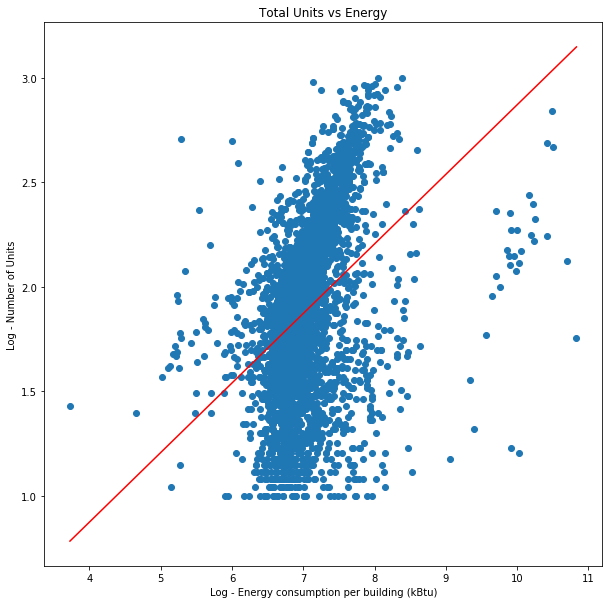

In [26]:
Y = sm.add_constant(np.log10(y))
linmodel_2 = sm.OLS(log_x, Y, missing='drop').fit()

x_hat = linmodel_2.predict(Y)

fig,ax = plt.subplots(1,1,figsize = (10,10))
ax.scatter(log_y, log_x)
ax.plot(np.sort(np.log10(y)), np.sort(x_hat), color = 'red')
plt.title('Total Units vs Energy')
plt.ylabel('Log - Number of Units')
plt.xlabel('Log - Energy consumption per building (kBtu)')

Total units vs Energy seems to be wrong model. 

In [27]:
linmodel_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     827.2
Date:                Mon, 23 Oct 2017   Prob (F-statistic):          2.05e-166
Time:                        23:22:39   Log-Likelihood:                -1746.4
No. Observations:                4266   AIC:                             3497.
Df Residuals:                    4264   BIC:                             3510.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4563      0.082     -5.596      0.000      -0.616      -0.296
TotalNrg       0.3328      0.012     28.761      0.000       0.310       0.356
==============================================================================
Omnibus:                      149.498   Durbin-Watson:                   1.385
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.251
Skew:                          -0.464   Prob(JB):                     1.31e-36
Kurtosis:                       3.260   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*** We cannot use likely hood ratio to compare the 2 models because they are not nested *** 

In [28]:
def chi2(data, model, errors = None):
    '''Calculates the chi sq given data, model and errors
    Arguments:
    data: series of datapoints (endogenous variable)
    model: series of predicted values corresponding to the observed data
    errors: serie of errors (optional). 
    If errors are not passes all errors are set to 1
    '''
    if errors is None:
        errors = np.ones_like(data)
    if data.shape == model.shape and data.shape == errors.shape:
        return (((data - model)**2) / errors**2).sum()
    else: 
        print ('''ERROR:
must pass arrays of identical dimension for data, model and (optional) error)''')
    return -1

In [29]:
df.columns

Index([               u'BBL', u'Site EUI(kBtu/ft2)',   u'Floor area (ft2)',
                 u'UnitsRes',         u'UnitsTotal',          u'YearBuilt',
                 u'TotalNrg'],
      dtype='object')

In [30]:
## Assume that there is error in the reported energy. 
## but that is the product of two measured qusntities, each of which will have errors. 
## The minimum error is the squareroot of the value

#Below I am writing out some uncertainties - please explain the functional form that I used.
#errors on the measured quantities
errorsnrg = np.sqrt((dfCut['Floor area (ft2)'])**2 +\
                (dfCut['Site EUI(kBtu/ft2)']**2))

## Assume count statistics in the number of units as well
errorsunits = np.sqrt(dfCut.UnitsTotal)

#These errors need to be propagated properly through the log


*** Interpretation: the formula shows how to calculate total error from its components. It is derived from basic trignometry ***

propagation of errors on the log:https://en.wikipedia.org/wiki/Propagation_of_uncertainty#Linear_combinations

$f=a\log _{10}(A)$

$\sigma _{f}\approx \left(a{\frac {\sigma _{A}}{A\ln(10)}}\right)$

In [31]:
errorsInLogNrg = np.abs(errorsnrg / dfCut.TotalNrg / np.log(10))
errorsInLogUnits = np.abs(errorsunits / dfCut.UnitsTotal / np.log(10))

dfCut['errorsnrg'] = errorsInLogNrg
dfCut['errorsunits'] = errorsInLogUnits

/home/pui-user/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/pui-user/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [32]:
#Chi Square Test on model 1

print(chi2(np.log10(y), y_hat, errorsInLogUnits))

540696.354646


In [33]:
#Chi Square Test on model 2

print(chi2(np.log10(x), x_hat, errorsInLogNrg))

234549612466.0


*** Interpretation: Model 2 (Units vs energy) has a higher Chi-square value compared to Model 1 (Energy vs Units) , so it is worse. Model 1 is better ***

# Fit Second degree curve

In [34]:
dfCut['log_TotalNrg'] = np.log10(dfCut['TotalNrg'])

dfCut['log_UnitsTotal'] = np.log10(dfCut['UnitsTotal'])


/home/pui-user/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/pui-user/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
quad_model = smf.ols("log_TotalNrg ~ log_UnitsTotal + I(log_UnitsTotal**2)", data = dfCut).fit()


In [36]:
quad_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_TotalNrg   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     617.1
Date:                Mon, 23 Oct 2017   Prob (F-statistic):          4.37e-236
Time:                        23:22:40   Log-Likelihood:                -2399.4
No. Observations:                4266   AIC:                             4805.
Df Residuals:                    4263   BIC:                             4824.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  8.0824      0.111     72.620      0.000       7.864       8.301
log_UnitsTotal            -1.6820      0.119    -14.175      0.000      -1.915      -1.449
I(log_UnitsTotal ** 2)     0.5710      0.031     18.465      0.000       0.510       0.632
==============================================================================
Omnibus:                     2411.825   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59289.371
Skew:                           2.208   Prob(JB):                         0.00
Kurtosis:                      20.722   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

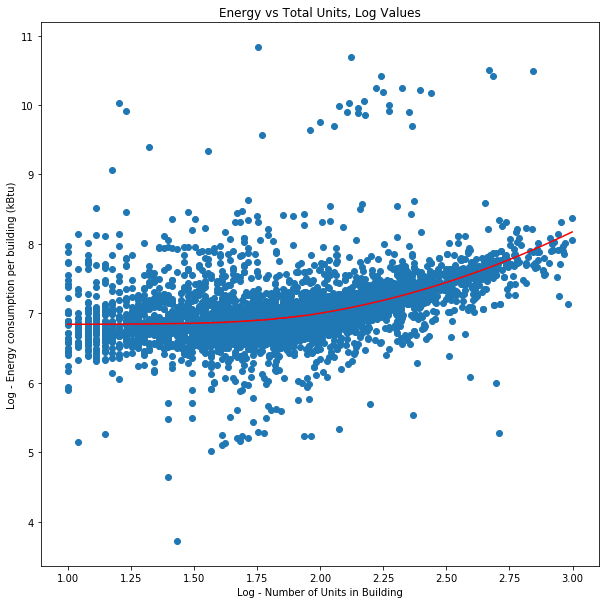

In [37]:
fig, ax = plt.subplots(1,1,figsize = (10,10))
ax.scatter(np.log10(x), np.log10(y))
ax.plot(np.sort(np.log10(x)), np.sort(quad_model.fittedvalues), color = 'red')
pl.title('Energy vs Total Units, Log Values')
pl.xlabel('Log - Number of Units in Building')
pl.ylabel('Log - Energy consumption per building (kBtu)');

6.    Compare the Units vs Energy line fit and the Units vs Energy 2-nd degree polynomial fit with the Likelihood ratio test. The formula is:

    LR = -2 * log(Likelihood_Model1 / Likelihood_Model2)

    or equivalently

    LR = -2 * (logLikelihood_Model1 - logLikelihood_Model2)

    where Model1 is the least complex (fewer parameters).

    Th logLikelihood can be extracted from the model summary when using statsmodels. (Model1.llf)

    Compare this LR statistics to a chi sq table (for example http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG) and say if at alpha = 0.05 Model1 is preferable to Model2. The LR is chi^2 distributed with number of degrees of freedom NDOFNDOF = parameters_Model2 - parameters_Model1

Also if you used statsmodels for the fit you can use the 
compare_lr_test() method of your fit and verify you got the right answer.  Use the method compare_lr_test() of the most complex model of the 2 and pass it the result of stats models for the simpler fit 
(e.g. smf.ols(formula = ...).fit().compare_lr_test(sm.OLS(...).fit()))


In [38]:
print ("LR : ", -2 * (-linmodel_1.llf - (-quad_model.llf)))
print ("LR from statsmodels: ", linmodel_1.compare_lr_test(quad_model)[0])

LR :  -328.25131092
LR from statsmodels:  -328.25131092


*** Conclusion: We can see that the LR value obtained by using the formula and by using statmodels is the same ***